# Unit 5 - Financial Planning

In [123]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [124]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [125]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_fetch= requests.get(btc_url)
eth_fetch = requests.get(eth_url)

In [126]:
# Set current amount of crypto assets
btc = 100
eth = 20

In [127]:
# Fetch current BTC price
btc_price = btc_fetch.json()
btc_price= btc_price['data']['1']['quotes']['USD']['price']
btc_price

29690.0

In [128]:
# Fetch current ETH price
eth_price = eth_fetch.json()
eth_price = eth_price['data']['1027']['quotes']['USD']['price']
eth_price



1606.71

In [129]:

# Compute current value of my crpto
btc_current_value = btc_price * btc
eth_current_value = eth_price * eth

# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${btc_current_value:0.2f}")
print(f"The current value of your {eth} ETH is ${eth_current_value:0.2f}")

The current value of your 100 BTC is $2969000.00
The current value of your 20 ETH is $32134.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [130]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [131]:
# Set Alpaca API key and secret
alpaca_api = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api_object= tradeapi.REST(
    alpaca_api,
    secret_key,
    api_version= 'v2')

In [132]:

# Format current date as ISO format
start = pd.Timestamp("2010-01-01", tz = "America/New_York").isoformat()
end = pd.Timestamp("2023-10-18", tz = "America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"


In [133]:

# Get current closing prices for SPY and AGG
data_frame = api_object.get_bars(
    timeframe=timeframe,
    symbol = tickers,
    start = end,
    end = end
).df

data_frame.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-18 04:00:00+00:00,92.02,92.375,91.94,31233,92.29,9352743,92.096451,AGG
2023-10-18 04:00:00+00:00,430.21,435.180,429.09,691077,434.19,93559799,432.132728,SPY


In [134]:

# Reorganize the DataFrame
# Separate ticker data
SPY = data_frame[data_frame['symbol'] == 'SPY'].drop('symbol', axis=1)
AGG= data_frame[data_frame['symbol'] == 'AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
data_frame = pd.concat([SPY, AGG], axis =1, keys = ["SPY", "AGG"])


In [135]:

# Preview DataFrame
data_frame.tail()

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2023-10-18 04:00:00+00:00  430.21  435.18  429.09      691077  434.19   

                                                   AGG                 \
                             volume        vwap  close    high    low   
timestamp                                                               
2023-10-18 04:00:00+00:00  93559799  432.132728  92.02  92.375  91.94   

                                                                  
                          trade_count   open   volume       vwap  
timestamp                                                         
2023-10-18 04:00:00+00:00       31233  92.29  9352743  92.096451

In [136]:
# Pick AGG and SPY close prices
spy_close_price = float(data_frame['SPY']['close'])
agg_close_price = float(data_frame['AGG']['close'])


In [137]:

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $92.02
Current SPY closing price: $430.21


In [138]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

In [139]:

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21510.50
The current value of your 200 AGG shares is $18404.00


### Savings Health Analysis

In [140]:
# Set monthly household income
monthly_income = 3500

# Consolidate financial assets data
assets = {
    'stocks':['TGT', 'AAPL'],
    'amount':[300, 3000]

}
df_assets = pd.DataFrame(assets)
df_assets

,stocks,amount
0,TGT,300
1,AAPL,3000


In [141]:

# Create savings DataFrame
df_savings = df_assets.groupby("stocks").sum()
#renaming columns

df_savings.rename(columns={'amount': 'Total Value'}, inplace = True)
# Display savings DataFrame
display(df_savings)


,Total Value
stocks,
AAPL,3000
TGT,300


array([<Axes: ylabel='Total Value'>], dtype=object)

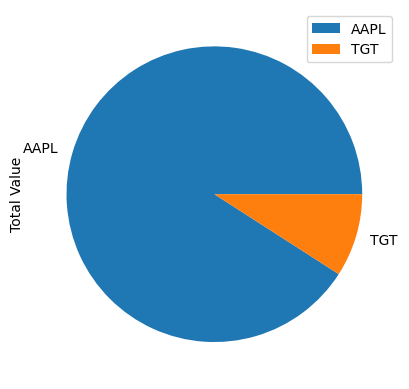

In [142]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', subplots= True)

In [143]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = sum(df_savings['Total Value'])
total_amount_savings = total_amount_savings + emergency_fund
total_amount_savings
# Validate saving health
if total_amount_savings > emergency_fund:
    print(f"Congratulations you have surpassed your financial Goal")
elif total_amount_savings == emergency_fund:
    print(f"Congratulations you have reachead your Financial Goal")
else:
    print(f"You are {emergency_fund - total_amount_savings} from reaching your Financial Goal.")

Congratulations you have surpassed your financial Goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [144]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-18', tz='America/New_York').isoformat()

In [145]:

timeframe = '1Day'
tickers = ['SPY', 'AGG']

In [146]:

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api_object.get_bars(
    timeframe= timeframe,
    symbol= tickers,
    start= start_date,
    end= end_date
).df
df_stock_data.head(1)

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2018-10-18 04:00:00+00:00,104.46,104.6195,104.375,13495,104.39,3550735,104.496375,AGG


In [147]:

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis =1)
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])


In [148]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_distribution = MCSimulation(
    portfolio_data= df_stock_data,
    weights= [.25, .75],
    num_simulation= 1000,
    num_trading_days= 252 *30

)

In [149]:
# Printing the simulation input data
MC_distribution.portfolio_data.tail()

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2023-10-12 04:00:00+00:00  433.66  437.335  431.23      607473  436.95   
2023-10-13 04:00:00+00:00  431.50  436.450  429.88      665922  435.21   
2023-10-16 04:00:00+00:00  436.04  437.140  433.57      540501  433.82   
2023-10-17 04:00:00+00:00  436.02  438.140  432.45      579314  432.81   
2023-10-18 04:00:00+00:00  430.21  435.180  429.09      691077  434.19   

                                                                AGG           \
                             volume        vwap daily_return  close     high   
timestamp                                                                      
2023-10-12 04:00:00+00:00  81154231  434.478465    -0.006096  93.24  93.9100   
2023-10-13 04:00:00+00:00  95201134  432.342930    -0.004981  93.64  93.7900   
2023-10-16 04:00:00+00:00  75433196  435.644964     0.010521  93.12  93.4050   
2023-10-17 04:00:00+00:00  75324710  435.388283    -0.000046  92.45  92.6873   
2023-10-18 04:00:00+00:00  93559799  432.132728    -0.013325  92.02  92.3750   

                                                                            \
                               low trade_count   open    volume       vwap   
timestamp                                                                    
2023-10-12 04:00:00+00:00  93.1700       30467  93.87  11189794  93.390341   
2023-10-13 04:00:00+00:00  93.5234       23536  93.68   7516133  93.619866   
2023-10-16 04:00:00+00:00  93.1000       26440  93.32   6332779  93.185506   
2023-10-17 04:00:00+00:00  92.3500       27327  92.51   8225873  92.502855   
2023-10-18 04:00:00+00:00  91.9400       31233  92.29   9352743  92.096451   

                                        
                          daily_return  
timestamp                               
2023-10-12 04:00:00+00:00    -0.008612  
2023-10-13 04:00:00+00:00     0.004290  
2023-10-16 04:00:00+00:00    -0.005553  
2023-10-17 04:00:00+00:00    -0.007195  
2023-10-18 04:00:00+00:00    -0.004651

In [150]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_distribution.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000538,0.996215,0.996187,1.008397,1.000410,1.008385,0.997510,0.998971,1.000522,0.996500,...,1.004156,1.002082,1.006019,1.003610,0.993001,0.999141,1.008491,0.995652,0.999516,0.994320
2,1.004219,0.998776,0.998641,1.006995,1.000598,1.007659,0.997521,0.996301,1.004646,0.987289,...,1.003820,1.009349,1.010337,0.998651,0.991599,0.992814,1.009073,0.997277,0.995849,0.992260
3,0.991224,1.006184,0.993257,1.006728,0.995899,1.002640,0.996616,0.992709,1.004965,0.987143,...,1.008289,1.003005,1.001945,0.999614,1.000016,0.988192,1.007313,0.990652,0.997490,0.989964
4,0.983407,1.008380,0.991810,1.011084,0.992707,1.000369,0.991592,0.996865,1.005151,0.989120,...,1.004226,1.008389,1.005753,0.996060,0.998150,0.981672,0.999474,0.990246,1.002061,0.985766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.147942,1.429896,0.442692,1.581055,2.210963,1.366883,1.606782,0.936399,1.101706,1.382739,...,2.108939,1.697916,1.419114,1.262981,1.332693,1.295182,1.265257,1.463945,1.034883,1.124549
7557,1.154945,1.438139,0.445679,1.590947,2.207762,1.375417,1.597052,0.930441,1.097737,1.381970,...,2.109000,1.697110,1.416054,1.260899,1.334299,1.283772,1.267142,1.465535,1.027942,1.126654
7558,1.153625,1.438041,0.445583,1.600461,2.203028,1.377936,1.601503,0.934081,1.104456,1.389831,...,2.120194,1.704847,1.410003,1.263828,1.341059,1.282989,1.266138,1.453380,1.030122,1.125568
7559,1.146799,1.435457,0.447572,1.607028,2.198818,1.377146,1.603486,0.933458,1.093177,1.396266,...,2.108536,1.692558,1.401213,1.257361,1.338687,1.282831,1.267941,1.444802,1.030275,1.128150


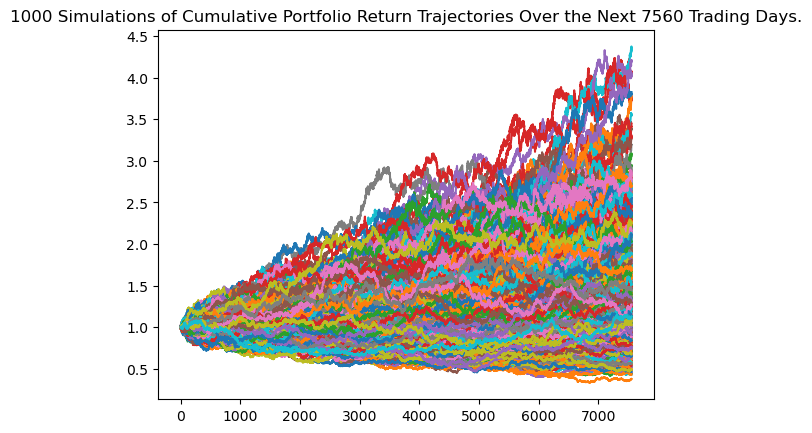

In [151]:
# Plot simulation outcomes
mc_lineplot = MC_distribution.plot_simulation()

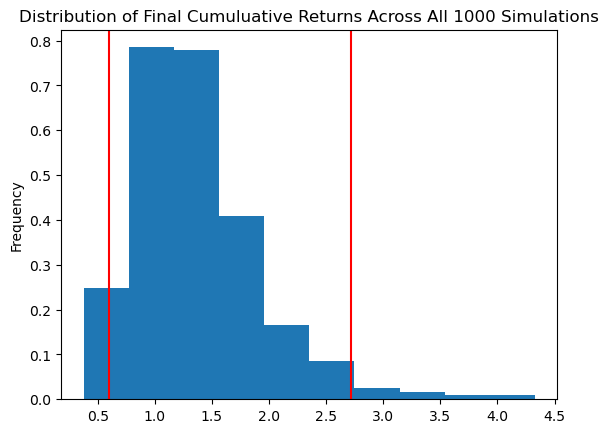

In [152]:
# Plot probability distribution and confidence intervals
dist_prob = MC_distribution.plot_distribution()

### Retirement Analysis

In [153]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_stats = MC_distribution.summarize_cumulative_return()
# Print summary statistics
MC_stats

count           1000.000000
mean               1.368268
std                0.557115
min                0.378824
25%                0.978589
50%                1.277691
75%                1.621916
max                4.327777
95% CI Lower       0.593872
95% CI Upper       2.715112
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [154]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(MC_stats.iloc[8]* 20000, 2)
ci_lower = round(MC_stats.iloc[9]* 20000, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54302.25 and $11877.44


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [155]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(MC_stats.iloc[8] * initial_investment, 2)
ci_lower = round(MC_stats.iloc[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81453.37 and $17816.16


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [156]:
import warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

In [163]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_distribution = MCSimulation(
    portfolio_data= df_stock_data,
    weights= [.25, .75],
    num_simulation= 1000,
    num_trading_days= 252*5
)

In [164]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_distribution.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997169,0.998703,0.998808,0.997673,0.988749,0.996679,1.004214,0.993407,1.001597,1.008013,...,1.001757,0.999231,1.008837,1.003681,1.001605,1.003415,0.999888,1.003913,1.007574,0.998736
2,0.998886,1.001016,0.997557,0.996313,0.993128,0.990064,1.008032,0.995366,1.001395,1.011104,...,1.001177,0.998143,1.009153,1.002936,1.004265,1.010003,0.998174,1.007249,1.008539,0.992652
3,0.984160,1.001340,0.999830,0.998048,0.990112,0.986674,1.013279,0.996691,0.996296,1.004262,...,1.009354,0.993712,1.010984,1.001025,1.005846,1.003449,0.999498,0.999839,1.003818,0.989662
4,0.986098,0.997998,0.997886,1.004850,0.993855,0.980408,1.015385,0.996422,0.998700,1.002448,...,1.012568,0.993669,1.018803,1.009363,1.002502,0.999571,0.999901,0.996845,1.009967,0.986584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.770932,1.255651,0.900520,0.805614,0.970611,1.181269,1.056795,0.889966,1.188081,1.023154,...,0.826124,1.310067,1.087233,0.981415,1.329204,1.168609,0.973594,0.828264,1.268653,1.077908
1257,0.778147,1.260634,0.906831,0.803969,0.969864,1.182988,1.058163,0.894939,1.188372,1.016394,...,0.823450,1.302893,1.083887,0.985180,1.320000,1.169614,0.974252,0.834406,1.269167,1.076319
1258,0.773490,1.265112,0.907344,0.798934,0.967859,1.184966,1.066691,0.894231,1.193549,1.021190,...,0.822575,1.304093,1.086502,0.978763,1.318624,1.172165,0.973029,0.828000,1.267177,1.077070
1259,0.767702,1.263155,0.908124,0.798056,0.975542,1.184179,1.069958,0.897300,1.193306,1.016822,...,0.829411,1.303541,1.087342,0.977951,1.322473,1.180345,0.974472,0.824854,1.257966,1.078400


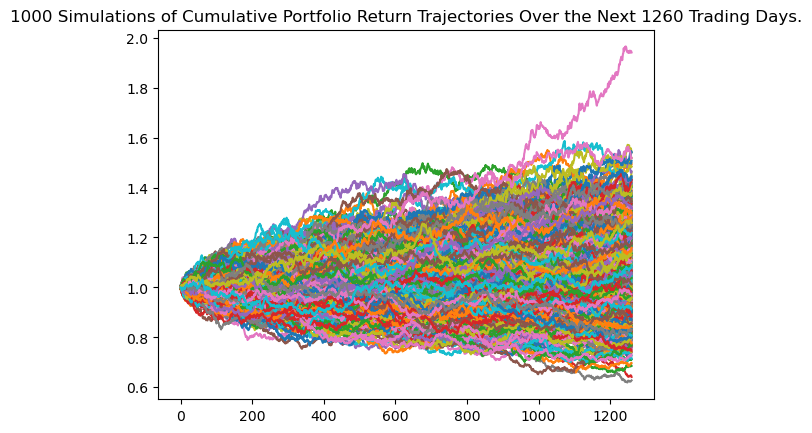

In [166]:
# Plot simulation outcomes
mc_lineplot = MC_distribution.plot_simulation()

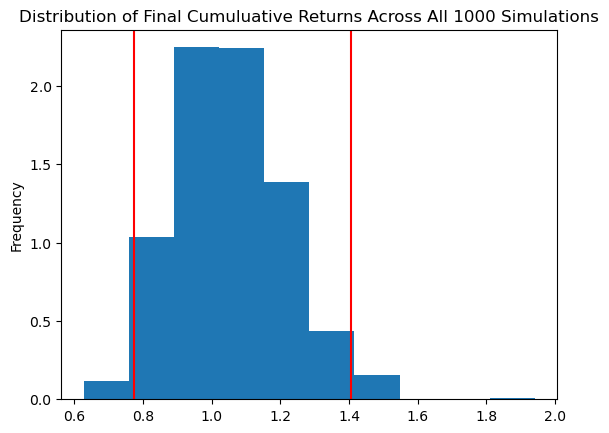

In [167]:
# Plot probability distribution and confidence intervals
MC_distribution_plot = MC_distribution.plot_distribution()

In [168]:
# Fetch summary statistics from the Monte Carlo simulation results

MC_stats = MC_distribution.summarize_cumulative_return()


# Print summary statistics
MC_stats

count           1000.000000
mean               1.052470
std                0.159535
min                0.627672
25%                0.936432
50%                1.040446
75%                1.158741
max                1.940842
95% CI Lower       0.774640
95% CI Upper       1.404171
Name: 1260, dtype: float64

In [169]:
# Set initial investment
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_stats.iloc[8] * initial_investment, 2)
ci_upper_five = round(MC_stats.iloc[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46478.38 and $84250.27


### Ten Years Retirement Option

In [171]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_distribution = MCSimulation(
    portfolio_data= df_stock_data,
    weights= [.25, .75],
    num_simulation= 1000,
    num_trading_days= 252 * 10
)

In [172]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_distribution.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005971,1.003012,0.992125,1.003820,1.004162,0.996058,1.000023,1.002078,0.999511,1.004382,...,0.999190,1.004490,0.997277,1.004018,0.996854,0.998533,1.000728,1.000415,0.989422,1.007077
2,1.011127,1.007263,0.984313,1.006784,1.001066,0.991815,1.003338,1.005769,0.997765,1.009008,...,0.994588,1.001911,0.999212,1.004402,0.984566,0.997592,0.998708,1.007058,0.985874,1.016056
3,1.016969,1.013189,0.987947,1.000176,1.001800,1.001872,1.002181,1.009465,1.002126,1.004117,...,0.998945,1.001990,0.998440,1.003897,0.977497,0.990569,0.989114,1.002601,0.987937,1.018909
4,1.013482,1.005481,0.984286,1.002949,1.005913,1.004885,1.003939,1.013913,1.005617,1.003751,...,1.003262,0.997536,0.997593,1.012073,0.975605,0.988306,0.990598,1.004767,0.983586,1.013275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.219483,0.895925,0.845605,1.275636,0.903399,0.784343,0.900715,1.743362,1.482016,0.875929,...,1.274955,1.357267,1.253156,0.639249,0.977519,0.893672,1.120019,1.057382,1.197848,0.760384
2517,1.219517,0.895714,0.846762,1.268166,0.901631,0.788374,0.900703,1.744187,1.482868,0.877241,...,1.270407,1.364627,1.247062,0.643518,0.976456,0.894106,1.121152,1.068203,1.200582,0.759791
2518,1.217938,0.894455,0.852884,1.266508,0.905333,0.795522,0.898617,1.722491,1.491163,0.870064,...,1.271294,1.372278,1.245562,0.644086,0.969519,0.902180,1.128304,1.066259,1.195956,0.760986
2519,1.218517,0.891876,0.854333,1.272948,0.900640,0.794661,0.895730,1.738595,1.492897,0.873822,...,1.268560,1.378801,1.243460,0.649473,0.966646,0.906075,1.123447,1.065227,1.192143,0.762908


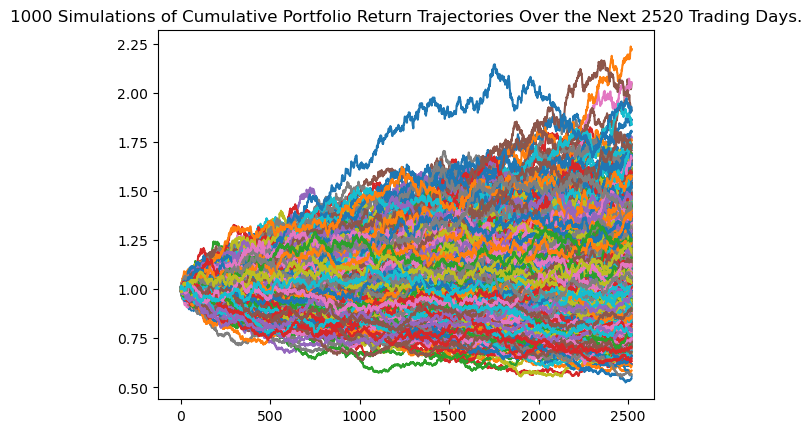

In [173]:
# Plot simulation outcomes
mc_lineplot = MC_distribution.plot_simulation()

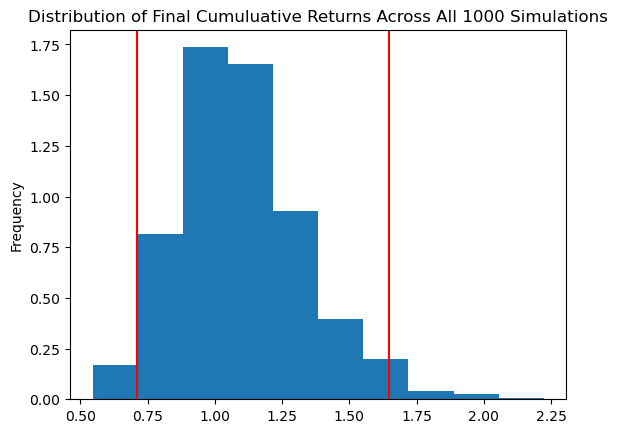

In [174]:
# Plot probability distribution and confidence intervals
MC_distribution_plot = MC_distribution.plot_distribution()

In [175]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_stats = MC_distribution.summarize_cumulative_return()

# Print summary statistics
MC_stats

count           1000.000000
mean               1.098600
std                0.235800
min                0.546374
25%                0.927733
50%                1.074097
75%                1.228550
max                2.222385
95% CI Lower       0.709299
95% CI Upper       1.645609
Name: 2520, dtype: float64

In [176]:
# Set initial investment
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_stats[8]* initial_investment, 2)
ci_upper_ten = round(MC_stats[9]* initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $42557.97 and $98736.54


Looking at all three simulations, there is a High level of Risk vs. Award; I would change the Weight breaks to compare the different outcomes and come up with an efficient frontier and, from there, implement more historical parameters to determine the effective Weights to have a higher reward compensation per unit of risk.